#### Pequena análise do dataset das Bikes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("NYC-BikeShare-2015-2017-combined.csv")

In [9]:
data.head()

,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min,Age Filtered,Gen Filtered,Cont
0,0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6,51-60,Masculino,1
1,1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,12,51-60,Masculino,1
2,2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,45,31-40,Masculino,1
3,3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,5,41-50,Masculino,1
4,4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,1984.0,0,9,31-40,Desconhecido,1


In [3]:
data.describe()

,Unnamed: 0,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender,Trip_Duration_in_min
count,735502.000000,7.355020e+05,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000,735502.000000
mean,10582.401084,9.343125e+02,3206.764183,40.723125,-74.046412,3203.387325,40.722371,-74.045415,24914.009133,1979.544239,1.123668,15.570669
std,7679.871929,4.063878e+04,26.546683,0.008121,0.011191,64.358120,0.095296,0.173044,753.768581,9.371192,0.519694,677.312437
min,0.000000,6.100000e+01,3183.000000,40.692640,-74.096937,147.000000,0.000000,-74.096937,14552.000000,1900.000000,0.000000,1.000000
25%,4484.000000,2.460000e+02,3186.000000,40.717732,-74.050656,3186.000000,40.716540,-74.050444,24486.000000,1975.000000,1.000000,4.000000
50%,9156.000000,3.830000e+02,3202.000000,40.721525,-74.044247,3199.000000,40.721124,-74.043845,24602.000000,1982.000000,1.000000,6.000000
75%,15003.000000,6.520000e+02,3211.000000,40.727596,-74.038051,3211.000000,40.727224,-74.036486,24711.000000,1986.000000,1.000000,11.000000
max,34148.000000,2.026021e+07,3426.000000,40.752559,-74.032108,3442.000000,40.801343,0.000000,29296.000000,2000.000000,2.000000,337670.000000


#### Análise Idade com Tempo Médio de Viagem

In [4]:
def clusterage(x):
    if 2017-x <= 20:
      return "0-20"
    elif 2017-x <= 30:
      return "21-30"
    elif 2017-x<=40:
      return "31-40"
    elif 2017-x<=50:
      return "41-50"
    elif 2017-x<=60:
      return "51-60"
    elif 2017-x<=70:
      return "61-70"
    elif 2017-x<=80:
      return "71-80"
    elif 2017-x<=90:
      return "81-90"
    elif 2017-x<=100:
      return "91-100"
    else:
      return ">100"

data_with_filter_age = data

data_with_filter_age['Age Filtered']=data['Birth Year'].map(lambda x:clusterage(x))

              Trip_Duration_in_min
Age Filtered                      
0-20                     14.848545
21-30                    11.742296
31-40                    17.730651
41-50                    15.716549
51-60                    13.706858
61-70                    10.911583
71-80                    18.007335
81-90                     4.210084
>100                      9.473684


<AxesSubplot:xlabel='Age Filtered'>

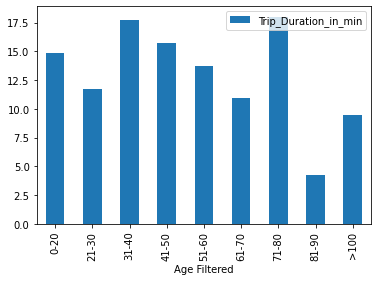

In [5]:
min_age=data_with_filter_age[['Age Filtered', 'Trip_Duration_in_min']].groupby('Age Filtered').mean()
print(min_age)
min_age.plot(kind='bar')

Podemos perceber uma diminuição no tempo de viagem entre as pessoas de 41-70 e depois um aumento com as pessoas de 71-80, acredito que posso ser uma maior preocupação com a saúde, ou, até mesmo, falta do que fazer

#### Buscando relação entre o Tempo Médio de Viagem e o Gênero

In [6]:
def clustergen(x):
    if x==0:
      return "Desconhecido"
    elif x==1:
      return "Masculino"
    else:
      return "Feminino"

data_with_filter_gen = data

data_with_filter_gen['Gen Filtered']=data['Gender'].map(lambda x:clustergen(x))

              Trip_Duration_in_min
Gen Filtered                      
Desconhecido             59.570324
Feminino                 11.737864
Masculino                11.689415


<AxesSubplot:xlabel='Gen Filtered'>

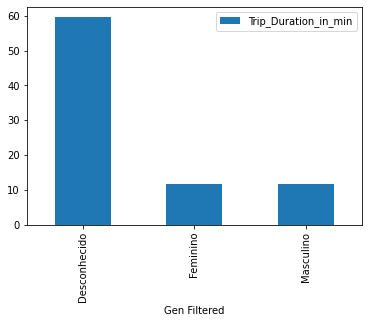

In [7]:
min_gen=data_with_filter_gen[['Gen Filtered', 'Trip_Duration_in_min']].groupby('Gen Filtered').mean()
print(min_gen)
min_gen.plot(kind='bar')

Duração média de viagem de Homens e Mulheres quase iguais, porém Desconhecido possui uma média muito alta (não consegui entender o porquê)

#### Quantidade de Viagens por Idade

                Cont
Age Filtered        
0-20            1512
21-30         156323
31-40         364119
41-50         133106
51-60          58760
61-70          20607
71-80            818
81-90            238
>100              19


<AxesSubplot:xlabel='Age Filtered'>

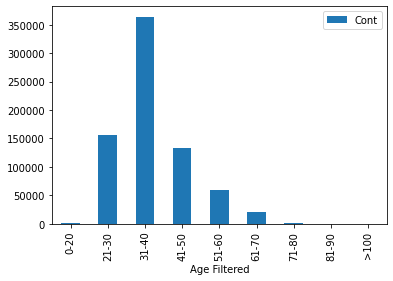

In [8]:
data_with_filter_age['Cont']=1

cont_age=data_with_filter_age[['Age Filtered', 'Cont']].groupby('Age Filtered').sum()
print(cont_age)
cont_age.plot(kind='bar')

Pessoas de 31-40 anos realizam mais viagens (seria legal ter um identificador de pessoa, para confirmar o intervalo de idade mais propenso a andar de bicicleta)